In [1]:
def reachable_nodes(graph, initial_node, k):
    visited = set()
    queue = [(initial_node, 0)]

    while queue:
        current_node, current_depth = queue.pop(0)

        if current_node not in visited and current_depth <= k:
            visited.add(current_node)
            if current_depth < k:
                for link in graph:
                    if link[0] == current_node:
                        queue.append((link[1], current_depth + 1))

    return visited

In [2]:
def max_utility_in_k_steps(graph, utility, initial_node, k):
    reachable = reachable_nodes(graph, initial_node, k)
    max_utility = 0

    for node in reachable:
        max_utility = max(max_utility, utility[node])

    return max_utility

In [22]:
def max_corrigable_score(graph, utility, initial_node, k, l,verbose=False):
    def reachable_nodes_k(graph, initial_node, k):
        visited = set()
        queue = [(initial_node, 0)]

        while queue:
            current_node, current_depth = queue.pop(0)

            if current_node not in visited and current_depth <= k:
                visited.add(current_node)
                if current_depth < k:
                    for link in graph:
                        if link[0] == current_node:
                            queue.append((link[1], current_depth + 1))

        return visited

    max_score = -float('inf')
    best_utility=None
    best_reachability=None

    for k0 in range(k + 1):
        reachable = reachable_nodes_k(graph, initial_node, k0)
        for node in reachable:
            remaining_reachable = len(reachable_nodes_k(graph, node, k - k0))
            current_score = (1 - l) * utility[node] + l * remaining_reachable
            if current_score>max_score:
                if verbose:
                    print("new best score",k0,node,utility[node],remaining_reachable,current_score)
                best_utility=utility[node]
                best_reachability=remaining_reachable
            max_score = max(max_score, current_score)

    return max_score, best_utility, best_reachability

In [4]:
graph=[(i,j) for i in range(5) for j in range(5)]+[(2,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,3)]
utility={i:i for i in range(11)}

In [7]:
reachable_nodes(graph,0,2)

{0, 1, 2, 3, 4, 5}

In [11]:
max_utility_in_k_steps(graph,utility,initial_node=0,k=2)

5

In [17]:
max_corrigable_score(graph, utility, initial_node=0, k=5, l=0.99)

new best score 0 0 9 8.91
new best score 1 2 9 8.93


8.93

In [27]:
import numpy as np
scores=[max_corrigable_score(graph, utility, initial_node=0, k=5, l=l) for l in np.linspace(0,1,100)]

In [24]:
import matplotlib.pyplot as plt

In [28]:
l=np.linspace(0,1,100)
score=[score for score, utility, reachability in scores]
u=[utility for score, utility, reachability in scores]
r=[reachability for score, utility, reachability in scores]

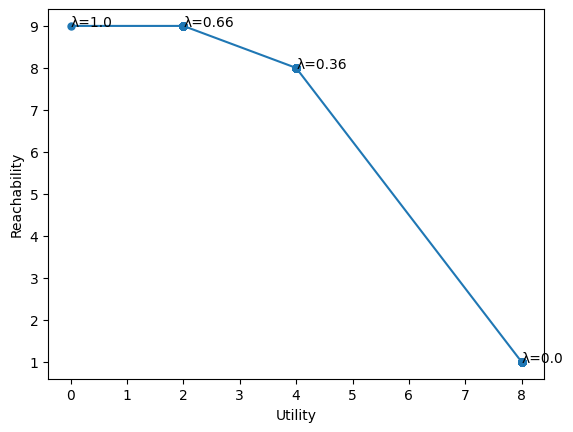

In [35]:

# Create a dictionary to store the first label for each unique point
point_labels = {}
for i in range(len(u)):
    point = (u[i], r[i])
    if point not in point_labels:
        point_labels[point] = str(l[i])[:4]

# Plot lines between points
plt.plot(u, r, linestyle='-', marker='o', markersize=5)

# Add the first label to each unique point
for point, label in point_labels.items():
    plt.text(point[0], point[1], "λ="+label)

plt.xlabel('Utility')
plt.ylabel('Reachability')
plt.show()